# Multiple Linear Regression Wire Pull_Strength

In [1]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
wire=pd.read_csv('Wire.csv')
wire

,Obs,Pull_Strength,Wire_Length,Die_Height
0,1,9.95,2,50
1,2,24.45,8,110
2,3,31.75,11,120
3,4,35.00,10,550
4,5,25.02,8,295
5,6,16.86,4,200
6,7,14.38,2,375
7,8,9.60,2,52
8,9,24.35,9,100
9,10,27.50,8,300


In [3]:
X1=np.array(wire["Wire_Length"])
X2=np.array(wire["Die_Height"])
y=np.array(wire["Pull_Strength"])

In [4]:
from statsmodels.formula.api import ols

model0=ols('Pull_Strength~Wire_Length',data=wire)
results0=model0.fit()
print(results0.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.962   
Dependent Variable: Pull_Strength    AIC:                129.3262
Date:               2023-06-26 16:58 BIC:                131.7640
No. Observations:   25               Log-Likelihood:     -62.663 
Df Model:           1                F-statistic:        615.1   
Df Residuals:       23               Prob (F-statistic): 4.24e-18
R-squared:          0.964            Scale:              9.5692  
------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept        5.1145    1.1458   4.4637  0.0002  2.7442  7.4848
Wire_Length      2.9027    0.1170  24.8008  0.0000  2.6606  3.1448
-----------------------------------------------------------------
Omnibus:               0.859        Durbin-Watson:          1.438
Prob(Omnibus):        

In [5]:
model0A=ols('Pull_Strength~Die_Height',data=wire)
results0A=model0A.fit()
print(results0A.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.210   
Dependent Variable: Pull_Strength    AIC:                205.4434
Date:               2023-06-26 16:58 BIC:                207.8812
No. Observations:   25               Log-Likelihood:     -100.72 
Df Model:           1                F-statistic:        7.380   
Df Residuals:       23               Prob (F-statistic): 0.0123  
R-squared:          0.243            Scale:              200.99  
------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept       14.5678    6.0326  2.4149  0.0241  2.0884  27.0472
Die_Height       0.0436    0.0160  2.7166  0.0123  0.0104   0.0768
-----------------------------------------------------------------
Omnibus:              0.017        Durbin-Watson:           2.021
Prob(Omnibus):        

In [6]:
from statsmodels.stats.anova import anova_lm
anova_results0 = anova_lm(results0)
print(anova_results0)

               df       sum_sq      mean_sq          F        PR(>F)
Wire_Length   1.0  5885.852069  5885.852069  615.08009  4.241181e-18
Residual     23.0   220.092635     9.569245        NaN           NaN


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Wire_Length', ylabel='Pull_Strength'>

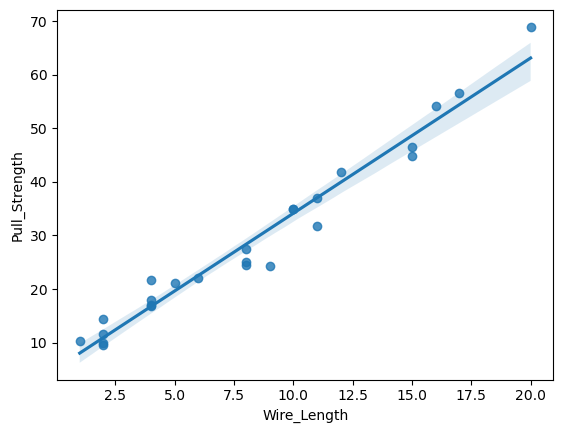

In [8]:
fig=plt.figure()
sns.regplot(x="Wire_Length",y="Pull_Strength",data=wire)

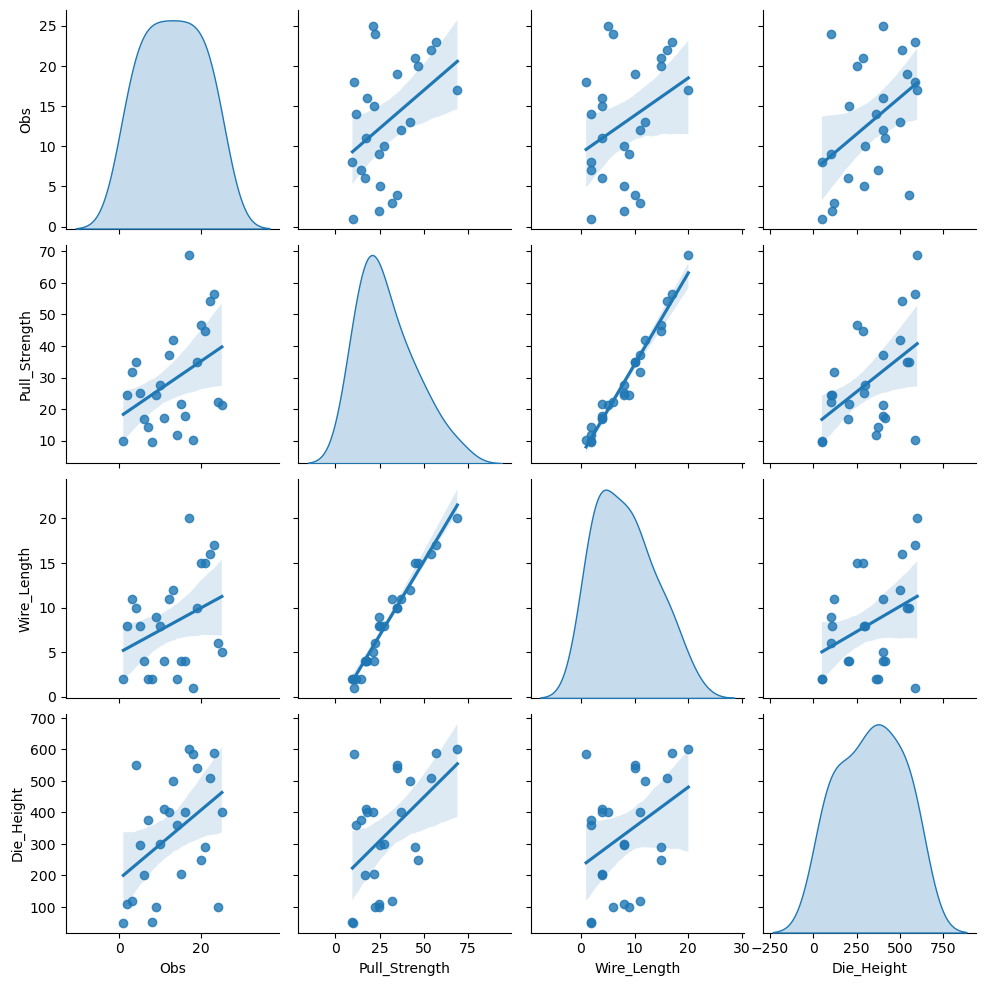

In [9]:
sns.pairplot(data=wire,kind='reg',diag_kind='kde')
plt.show()

In [10]:
model1=ols('Pull_Strength~Wire_Length+Die_Height',data=wire)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.979   
Dependent Variable: Pull_Strength    AIC:                115.1360
Date:               2023-06-26 16:58 BIC:                118.7926
No. Observations:   25               Log-Likelihood:     -54.568 
Df Model:           2                F-statistic:        572.2   
Df Residuals:       22               Prob (F-statistic): 1.08e-19
R-squared:          0.981            Scale:              5.2352  
------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept        2.2638    1.0601   2.1355  0.0441  0.0653  4.4622
Wire_Length      2.7443    0.0935  29.3430  0.0000  2.5503  2.9382
Die_Height       0.0125    0.0028   4.4767  0.0002  0.0067  0.0183
-----------------------------------------------------------------
Omnibus:             

In [11]:
anova_results1 = anova_lm(results1)
print(anova_results1)

               df       sum_sq      mean_sq            F        PR(>F)
Wire_Length   1.0  5885.852069  5885.852069  1124.293044  2.208244e-20
Die_Height    1.0   104.919152   104.919152    20.041257  1.882655e-04
Residual     22.0   115.173483     5.235158          NaN           NaN


In [12]:
import statsmodels.api as sm

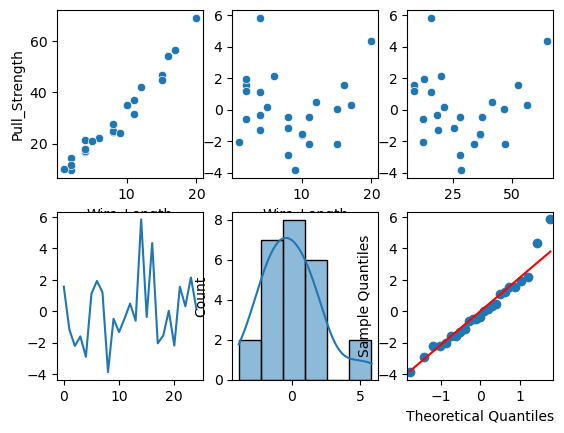

In [13]:
#  Assumptions review with X1 and 6-plot residual review
figure2, axis2 = plt.subplots(nrows=2, ncols=3)
sns.scatterplot(x=wire["Wire_Length"],y=wire["Pull_Strength"],data=wire,ax=axis2[0,0])
sns.scatterplot(x=wire["Wire_Length"],y=results1.resid,data=wire,ax=axis2[0,1])
sns.scatterplot(x=results1.predict(),y=results1.resid,data=wire,ax=axis2[0,2])
sns.lineplot(x=np.arange(0,25,1),y=results1.resid,data=wire,ax=axis2[1,0])
sns.histplot(x=results1.resid, stat='count',kde=True,ax=axis2[1,1])
sm.qqplot(results1.resid,line='s',ax=axis2[1,2])
plt.show()

Text(0.5, 0.5, 'Die_Height')

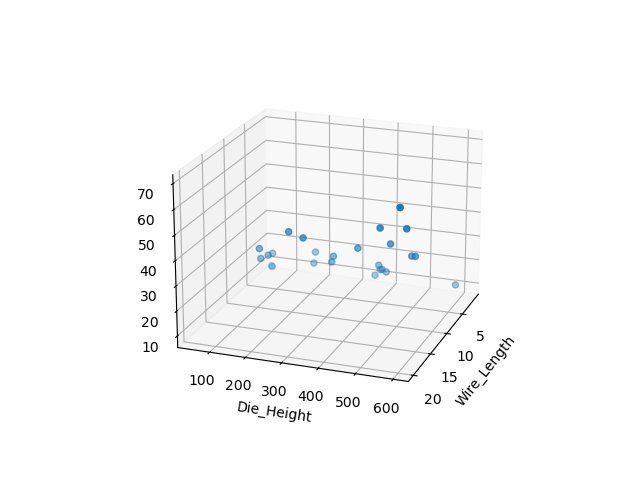

In [14]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=wire['Wire_Length']
y=wire['Die_Height']
z=wire['Pull_Strength']

ax.scatter(x,y,z)
ax.view_init(elev=20.,azim=20)
plt.xlabel("Wire_Length")
plt.ylabel("Die_Height")

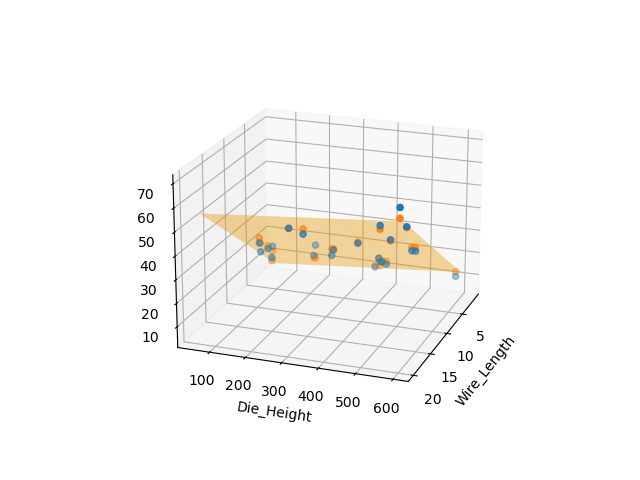

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

xSP=wire['Wire_Length']
ySP=wire['Die_Height']
zSP=wire['Pull_Strength']
plt.xlabel("Wire_Length")
plt.ylabel("Die_Height")

ax.scatter(xSP,ySP,zSP)
ax.view_init(elev=20,azim=20)

ax.scatter(xSP.values,ySP.values,results1.fittedvalues.values)

x1SP,y1SP=model1.exog_names[1:]

x_surfSP=np.arange(wire['Wire_Length'].min(), wire['Wire_Length'].max())
y_surfSP=np.arange(wire['Die_Height'].min(), wire['Die_Height'].max())
xSSP,ySSP=np.meshgrid(x_surfSP,y_surfSP)

exog=pd.DataFrame({x1SP: xSSP.ravel(), y1SP:ySSP.ravel()})
zSSP=results1.predict(exog=exog).values.reshape(xSSP.shape)
ax.plot_surface(xSSP,ySSP,zSSP,alpha=0.4,color='orange')

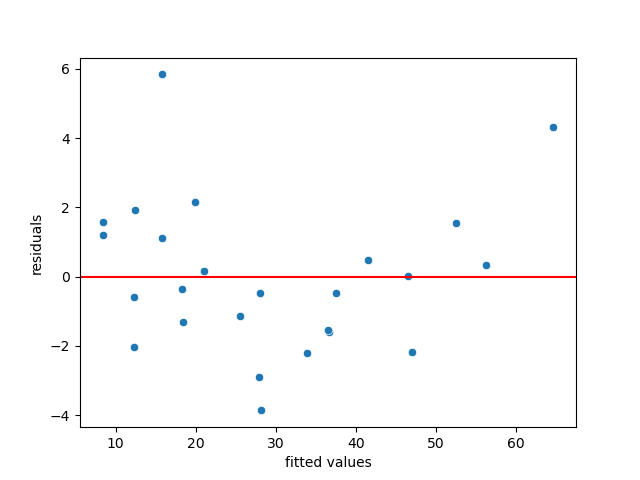

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)

sns.scatterplot(x=results1.fittedvalues,y=results1.resid)
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.axhline(0,color="red")

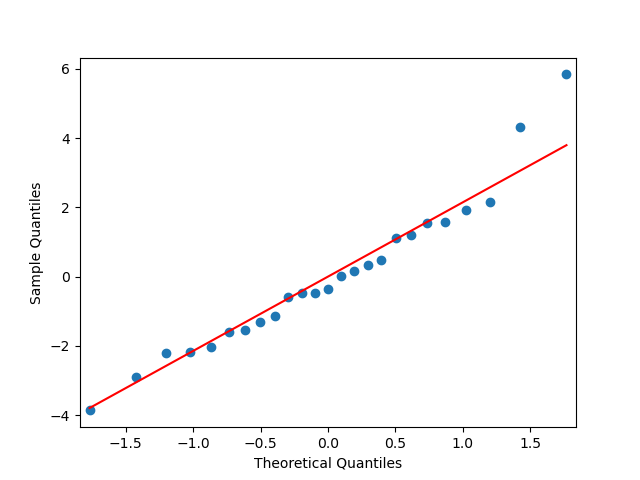

In [17]:
import statsmodels.api as sm
sm.qqplot(results1.resid,line='s')
plt.show()

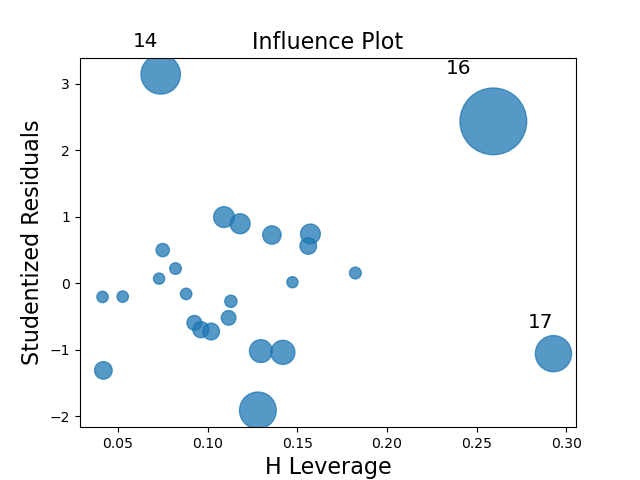

In [18]:
fig=sm.graphics.influence_plot(results1,criterion='cooks')

In [19]:
influence=results1.get_influence()
influence.summary_frame()

,dfb_Intercept,dfb_Wire_Length,dfb_Die_Height,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.317949,-0.100534,-0.200085,0.034817,0.748082,0.157289,0.323191,0.740359,0.319855
1,-0.140348,-0.051464,0.148315,0.011830,-0.531410,0.111646,-0.188390,-0.522557,-0.185252
2,-0.221915,-0.237136,0.339341,0.059620,-1.039923,0.141919,-0.422919,-1.041945,-0.423742
3,0.078764,0.022344,-0.184261,0.020507,-0.736404,0.101889,-0.248036,-0.728508,-0.245377
4,-0.157241,-0.009662,0.055328,0.024262,-1.291962,0.041784,-0.269788,-1.313052,-0.274192
5,0.130125,-0.058074,-0.049408,0.006907,0.505999,0.074868,0.143945,0.497268,0.141461
6,0.147985,-0.261849,0.142221,0.035990,0.898079,0.118061,0.328586,0.893971,0.327083
7,0.239496,-0.076575,-0.149787,0.019967,0.569111,0.156081,0.244750,0.560165,0.240903
8,-0.501169,-0.283749,0.605559,0.160075,-1.808925,0.127977,-0.692982,-1.915521,-0.733818
9,-0.024114,-0.001038,0.007461,0.000649,-0.212604,0.041317,-0.044136,-0.207929,-0.043166


In [20]:
wireWO=pd.read_csv('WireWOObs16.csv')
modelWO=ols('Pull_Strength~Wire_Length+Die_Height',data=wireWO)
resultsWO=modelWO.fit()
print(resultsWO.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.978   
Dependent Variable: Pull_Strength    AIC:                105.7808
Date:               2023-06-26 16:58 BIC:                109.3150
No. Observations:   24               Log-Likelihood:     -49.890 
Df Model:           2                F-statistic:        508.8   
Df Residuals:       21               Prob (F-statistic): 1.62e-18
R-squared:          0.980            Scale:              4.2767  
------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept        3.0795    1.0150   3.0340  0.0063  0.9687  5.1903
Wire_Length      2.6590    0.0915  29.0608  0.0000  2.4687  2.8493
Die_Height       0.0115    0.0026   4.4753  0.0002  0.0061  0.0168
-----------------------------------------------------------------
Omnibus:             

In [21]:
np.mean(wire["Pull_Strength"])

29.032799999999998

In [22]:
results1.get_prediction(exog=dict(Wire_Length=8,Die_Height=275)).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,27.663097,0.482122,26.663237,28.662956,22.81378,32.512413


In [23]:
predictions=results1.get_prediction(wire).summary_frame(alpha=0.05)
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,8.378721,0.907433,6.496821,10.260621,3.274047,13.483396
1,25.596008,0.764516,24.010499,27.181517,20.593010,30.599006
2,33.954095,0.861956,32.166507,35.741683,28.883432,39.024758
3,36.596784,0.730347,35.082138,38.111430,31.615790,41.577779
4,27.913653,0.467702,26.943699,28.883607,23.070414,32.756892
5,15.746432,0.626058,14.448068,17.044796,10.826890,20.665975
6,12.450260,0.786173,10.819837,14.080683,7.432847,17.467673
7,8.403777,0.903942,6.529116,10.278438,3.301767,13.505787
8,28.214999,0.818523,26.517488,29.912511,23.175387,33.254612
9,27.976292,0.465080,27.011775,28.940809,23.134139,32.818445


# Closed form solution to OLS regression

We can find the coefficients that fit this model through the solutions to the closed form solution of minimizing the sum of the squared error terms. 

Fit the multiple linear regression model

y = $\beta$<sub>0</sub> + $\beta$<sub>1</sub>x<sub>1</sub> + $\beta$<sub>2</sub>x<sub>2</sub> + $\epsilon$

We will do this through using the normal equations that are found using calculus (minimizing the squares of the residuals by partial differentiation and setting these equal to 0).  There will be one more than the number of predictors; one for each of the unknown regression coefficients.  The solution to the normal equations will be the estimators of the regression coefficients beta, beta1, and beta2.  

Calculate the summary stats needed in the set of linear equations to solve the normal equations.

In [24]:
np.sum(X1)

206

In [25]:
np.sum(X2)

8294

In [26]:
np.sum(y)

8294

In [27]:
np.sum(np.square(X1))

2396

In [28]:
np.sum(np.square(X2))

3531848

In [29]:
np.sum(X1*X2)

77177

In [30]:
np.sum(X1*y)

77177

In [31]:
np.sum(X2*y)

3531848

Will have 3 equations and 3 unknowns

25$\beta$<sub>0</sub> + 206$\beta$<sub>1</sub> + 8294$\beta$<sub>2</sub> = 725.82  

206$\beta$<sub>0</sub> + 2396$\beta$<sub>1</sub> + 77177$\beta$<sub>2</sub> = 8008.37  

8294$\beta$<sub>0</sub> + 77177$\beta$<sub>1</sub> + 3531848$\beta$<sub>2</sub> = 274816

Solve for this to find the beta coefficients, so the fitted regression equations is:

$\hat{y}$ = 2.26379 + 2.74427x<sub>1</sub> + 0.01253x<sub>2</sub>

# Matrix formulation

We can also use the matrix formulation of the above.  The model is a system of 3 equations that are expressed in matrix notation as:

**y = X$\beta$ + $\epsilon$**

The normal equations in matrix form:  **X$'$X$\hat{\beta}$ = X$'$y**

solve for $\hat{\beta}$, the vector of the regression coefficients

$\hat{\beta}$ = **(X$'$X)<sup>-1</sup>X$'$y**

we will mean center both the predictors and the response so that we have a 0 y-intercept value.

In [32]:
X1=np.array(wire["Wire_Length"])
X2=np.array(wire["Die_Height"])
y=np.array(wire["Pull_Strength"])

In [33]:
X1M=X1-np.mean(X1)
X2M=X2-np.mean(X2)
yM=y-np.mean(y)

In [34]:
# add columns of 1 so that you can fit an intercept term
X_biasM=np.ones((25,1)) # m is the number of records in the dataset

In [35]:
X1M=np.reshape(X1M,(25,1))
X2M=np.reshape(X2M,(25,1))
yM=np.reshape(yM,(25,1))

In [36]:
newXM=np.append(X_biasM,X1M,axis=1)
newXM=np.append(newXM,X2M,axis=1)
newXM

array([[ 1.0000e+00, -6.2400e+00, -2.8176e+02],
       [ 1.0000e+00, -2.4000e-01, -2.2176e+02],
       [ 1.0000e+00,  2.7600e+00, -2.1176e+02],
       [ 1.0000e+00,  1.7600e+00,  2.1824e+02],
       [ 1.0000e+00, -2.4000e-01, -3.6760e+01],
       [ 1.0000e+00, -4.2400e+00, -1.3176e+02],
       [ 1.0000e+00, -6.2400e+00,  4.3240e+01],
       [ 1.0000e+00, -6.2400e+00, -2.7976e+02],
       [ 1.0000e+00,  7.6000e-01, -2.3176e+02],
       [ 1.0000e+00, -2.4000e-01, -3.1760e+01],
       [ 1.0000e+00, -4.2400e+00,  8.0240e+01],
       [ 1.0000e+00,  2.7600e+00,  6.8240e+01],
       [ 1.0000e+00,  3.7600e+00,  1.6824e+02],
       [ 1.0000e+00, -6.2400e+00,  2.8240e+01],
       [ 1.0000e+00, -4.2400e+00, -1.2676e+02],
       [ 1.0000e+00, -4.2400e+00,  6.8240e+01],
       [ 1.0000e+00,  1.1760e+01,  2.6824e+02],
       [ 1.0000e+00, -7.2400e+00,  2.5324e+02],
       [ 1.0000e+00,  1.7600e+00,  2.0824e+02],
       [ 1.0000e+00,  6.7600e+00, -8.1760e+01],
       [ 1.0000e+00,  6.7600e+00, -4.176

In [37]:
X_transposeM=np.transpose(newXM)

In [38]:
XtYM=((X_transposeM.dot(yM)))
XtYM

array([[5.32907052e-14],
       [2.02771320e+03],
       [3.40186668e+04]])

In [39]:
XtXM=((X_transposeM.dot(newXM)))
XtXM

array([[ 2.50000000e+01, -2.66453526e-14,  2.27373675e-13],
       [-2.66453526e-14,  6.98560000e+02,  8.83444000e+03],
       [ 2.27373675e-13,  8.83444000e+03,  7.80230560e+05]])

In [40]:
XtX_InverseM=np.linalg.inv(XtXM)
XtX_InverseM

array([[ 4.00000000e-02,  1.95277943e-18, -3.37677874e-20],
       [ 1.95277943e-18,  1.67076313e-03, -1.89178140e-05],
       [-3.37677874e-20, -1.89178140e-05,  1.49587616e-06]])

In [41]:
beta_matrixM=XtX_InverseM.dot(XtYM)
beta_matrixM

array([[4.94256972e-15],
       [2.74426964e+00],
       [1.25278114e-02]])

Can use **e$'$e** = $\sum$ **e<sup>2</sup>** = $\sum$**(y-$\hat{y}$)<sup>2</sup>** = $\sum$**(y-X$\beta$)<sup>2</sup>** for sum of the squares of the residuals

In [42]:
np.transpose(yM-newXM.dot(beta_matrixM)).dot(yM-newXM.dot(beta_matrixM))

array([[115.17348278]])

In [43]:
SSRes=np.sum(np.square(results1.resid))
SSRes

115.17348278044093

In [44]:
MSE= np.sum(np.square(results1.resid)) / (22)
MSE

5.235158308201861

The diagonal of the XtX_Inverse matrix is holding the inverse of the sum of squares for each X component.  

The square root of the (MSE multiplied by the diagonal of the XtX_Inverse matrix) is the standard error of the coefficient.

In [45]:
# standard error for X1
np.sqrt(0.00167076313 * MSE)

0.0935238444518661

In [46]:
# standard error for X2
np.sqrt(1.49587616e-06 * MSE)

0.0027984189298718475

Finding R-squared

1 - [ $\sum$ **e<sup>2</sup>** / $\sum$**(y-$\bar{y}$)<sup>2</sup>** ] = 1 - [**e$'$e / y$'$y**]

In [47]:
SSTot=(np.transpose(yM)).dot(yM)
SSTot

array([[6105.944704]])

In [48]:
np.sum(np.square(yM))

6105.944704000001

In [49]:
1 - SSRes/SSTot

array([[0.98113748]])

# Geometric Formulation for linear algebra solution

we will mean center both the predictors and the response so that we have a 0 y-intercept value.

In [50]:
X1A=X1-np.mean(X1)
X2A=X2-np.mean(X2)
yA=y-np.mean(y)

In [51]:
model2=ols('yA~X1A+X2A',data=wire)
results2=model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.979   
Dependent Variable: yA               AIC:                115.1360
Date:               2023-06-26 16:58 BIC:                118.7926
No. Observations:   25               Log-Likelihood:     -54.568 
Df Model:           2                F-statistic:        572.2   
Df Residuals:       22               Prob (F-statistic): 1.08e-19
R-squared:          0.981            Scale:              5.2352  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept   0.0000     0.4576    0.0000   1.0000   -0.9490   0.9490
X1A         2.7443     0.0935   29.3430   0.0000    2.5503   2.9382
X2A         0.0125     0.0028    4.4767   0.0002    0.0067   0.0183
-----------------------------------------------------------------
Omnibus:       

We are now in vector space. 

We want the vector **$\beta$** to lie in the column space of **X**.

**y** is the vector of outcomes and **$\hat{y}$ = X$\hat{\beta}$** is the vector of predictions, with $\hat{\beta}$ as the coefficients on the columns of **X**

**$\hat{y}$** is the predictor vector, the vector projected onto the column space of **X**.  It lies as close as possible to the **y** vector, while being in the column space, so this is the smallest residual distance.  This works out to being that the vector of **($\hat{y}$ - y)** is orthogonal (perpendicular) to the column space of **X**.

The product of orthogonal vectors must be 0, so:

**X** dot **($\hat{y}$ - y)** = **X$'$($\hat{y}$ - y)** = 0

and therfore:  **X$'$(X$\beta$ - y)** = 0

Solving for $\beta$

**(X$'$X)$\beta$ = X$'$y**

**$\beta$ = (X$'$X)<sup>-1</sup>X$'$y**

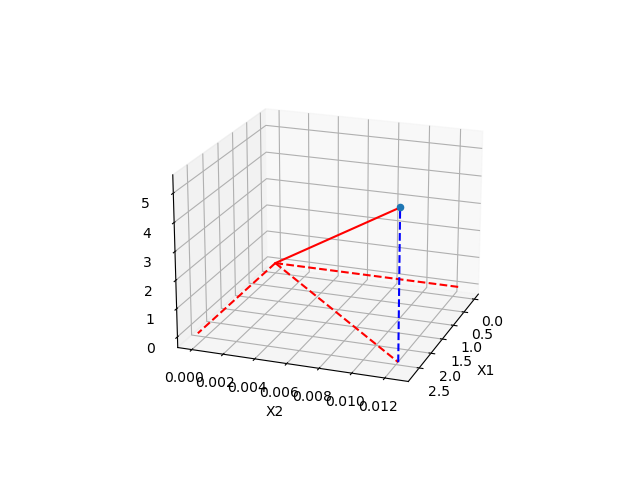

In [52]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

xV=2.7443
yV=0.0125
zV=(np.sum(np.square(results2.resid))/22)
plt.xlabel("X1")
plt.ylabel("X2")

ax.scatter(xV,yV,zV)
ax.plot([0,2.7443],[0,0.0125],[0,zV],color="red")
ax.plot([0,2.7443],[0,0.0125],[0,0],color="red",linestyle='dashed')
ax.plot([0,0],[0,0.0125],[0,0],color="red",linestyle='dashed')
ax.plot([0,2.7443],[0,0],[0,0],color="red",linestyle='dashed')
ax.plot([2.7443,2.7443],[0.0125,0.0125],[0,zV],color="blue",linestyle='dashed')
ax.view_init(elev=20.,azim=20)

# Gradient Descent 

In [53]:
theta_i = np.array([0, 0,0])
theta_i=np.reshape(theta_i,(3,1))
theta_i

array([[0],
       [0],
       [0]])

In [54]:
X1B=np.reshape(X1A,(25,1))
X2B=np.reshape(X2A,(25,1))
yB=np.reshape(yA,(25,1))

In [55]:
newXB=np.append(X_biasM,X1B,axis=1)
newXB=np.append(newXB,X2B,axis=1)

In [56]:
def gradient_descent(x, y, theta_init, step_init, maxsteps=10000000, precision=0.000000001):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    step=step_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)    # initial prediction using the initial theta value also yhat = a+bx with initial thetas
    error = y - pred    # initial error = pred - y = error for the initial prediction
    currentcost = np.sum(error ** 2) / (2 * m)    # initial cost function (trying to minimize the sum of squares)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1

    while abs(currentcost - oldcost) >= precision: # while the difference between the current cost and the previous cost is greater than the specified value
        oldcost=currentcost
        gradient = (x.T.dot(error)*-2)/m   # the 1st derivative of the cost function; the gradient
        theta = theta - step * gradient  #  the descent gradient or update function; theta - alpha (the step size or learning rate) times the gradient
        history.append(theta)
        
        pred = np.dot(x, theta) # update the prediction at the new theta
        error = y-pred # update the error
        currentcost = np.sum(error ** 2) / (2 * m) # update the cost function
        costs.append(currentcost)
            
        preds.append(pred) 
        counter+=1
        if counter == maxsteps:  # if the counter is at the max for the steps, then break from the loop
            break
        
    return history, costs, preds, counter

In [57]:
step_i=.00001
history, costs, preds, counter = gradient_descent(newXB, yB, theta_i, step_i)
theta = history[-1]
theta

array([[7.76987719e-16],
       [2.74397452e+00],
       [1.25311556e-02]])

In [58]:
counter

19082

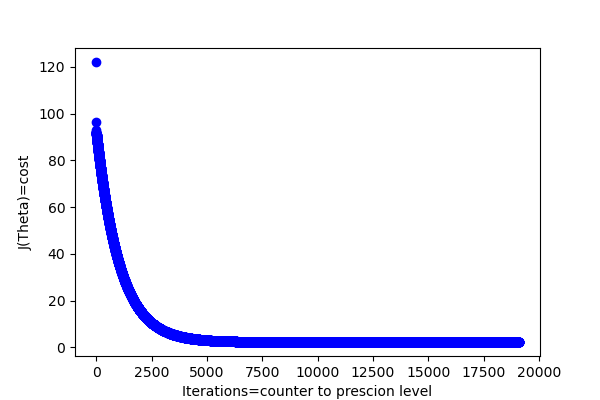

In [59]:
fig,ax = plt.subplots(figsize=(6,4))

n_iter=counter
ax.set_ylabel('J(Theta)=cost')
ax.set_xlabel('Iterations=counter to prescion level')
ax.plot(range(n_iter),costs,'bo')